23966.139661396614


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_68689/2423834417.py:140: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


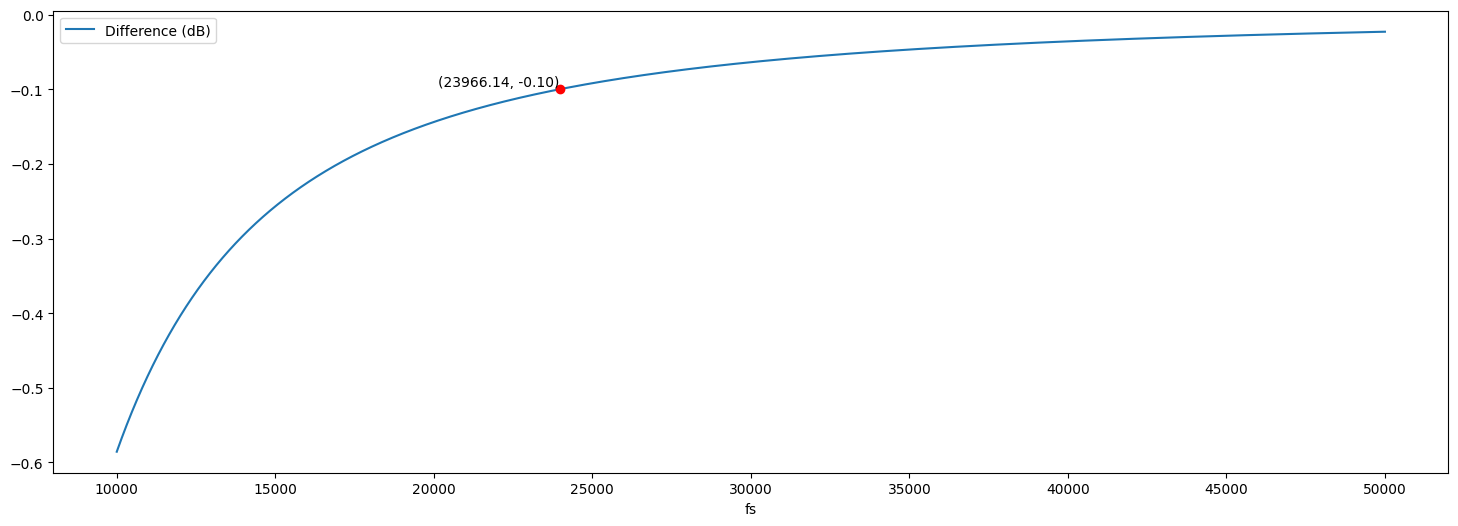

In [48]:
# [t3.c]
import numpy as np
import matplotlib.pyplot as plt

def expand(arr, n):
    return np.pad(arr, (0, n - len(arr)), 'constant')

def pzmap(bz, az):
    m = len(bz)
    n = len(az)
    level = max(m, n)
    pad_bz = expand(bz, level)
    pad_az = expand(az, level)
    return [np.roots(pad_bz), np.roots(pad_az)]

def plot_complex_numbers(bz, az):
    # Create a new figure with custom size
    fig = plt.figure(figsize=(6, 6))
    
    # Extract real and imaginary parts for both lists
    real_parts1 = [z.real for z in bz]
    imaginary_parts1 = [z.imag for z in bz]
    real_parts2 = [z.real for z in az]
    imaginary_parts2 = [z.imag for z in az]
    
    # Create scatter plots for both lists
    plt.scatter(real_parts1, imaginary_parts1, marker='o', color='blue', label='Zeros')
    plt.scatter(real_parts2, imaginary_parts2, marker='x', color='red', label='Poles')
    
    # Draw the unit circle
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)
    plt.plot(x_circle, y_circle, color='green', label='Unit Circle')
    
    # Set axis limits
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
    # Force the x and y axis to be the same scale (each 1x1 grid should look like a square)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Add labels and title
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Complex Numbers in the Complex Plane')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage
# bz = [2, 3]
# az = [1, -0.5]

def cap_h_value(bz, az, z: complex):
    num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
    den = sum([az[i] * z ** (-i) for i in range(len(az))])
    return num / den
def freqz(bz, az, w):
    ... # w between -pi and pi?
    hs = np.array([cap_h_value(bz, az, np.exp(1j * omega)) for omega in w])
    return w, hs

SAMPLE_N = 5000

def get_mod_pha_real_imag(c):
    return [np.abs(c), np.angle(c), c.real, c.imag]

def filter(bz, az, x, L):
    ...
    # y[n] = 
    xs = expand(x, L) # first several x
    ys = np.zeros_like(xs)
    def y_at(n):
        return 0 if n < 0 else ys[n]
    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        # calculate y[n]
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))]) - sum([az[i] * y_at(n - i) for i in range(1, len(az))])
    return xs, ys

R = 3
L = 0.02
C = 0.001
def gen_bz_az(f_s):
    bz = np.array([1, 2, 1])
    a1 = 1 + 2 * R * C * f_s + 4 * L * C * f_s ** 2
    az = np.array([a1, 2 - 8 * L * C * f_s ** 2, 1 - 2 * R * C * f_s + 4 * L * C * f_s ** 2])
    return bz / a1, az / a1

def hw(w):
    return 1 / (1 + 1j * w * R * C - w ** 2 * L * C)

def hz_w(w, w_s, bz, az):
    real_w = w / w_s * np.pi * 2
    return cap_h_value(bz, az, np.exp(1j * real_w))

def frequency_response(bz, az):
    ws = np.linspace(-np.pi, np.pi, SAMPLE_N)
    cap_hs = np.array([cap_h_value(bz, az, np.exp(1j * omega)) for omega in ws])
    return ws, cap_hs

def db(x):
    return 20 * np.log10(np.abs(x))

TEST_F = 1000
TEST_W = 2 * np.pi * TEST_F
def __draw(xs, ys, xlabel='x', ylabel='y'):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(xs, ys, label=ylabel)
    plt.legend()
    plt.xlabel(xlabel)
    fig.show()

try_f_s = np.linspace(10000, 50000, 100000)
try_diff = []
for f_s in try_f_s:
    bz, az = gen_bz_az(f_s)
    diff = np.abs(hz_w(TEST_W, 2 * np.pi * f_s, bz, az)) / np.abs(hw(TEST_W))
    try_diff.append(diff)
try_diff = db(np.array(try_diff))
fig = plt.figure(figsize=(18, 6))
plt.plot(try_f_s, try_diff, label='Difference (dB)')
plt.legend()
plt.xlabel('fs')

min_index = min(i for i, x in enumerate(try_diff) if abs(x) < 0.1)
min_f_s_that_makes_diff_less_than_0_point_1_db = try_f_s[min_index]
print(min_f_s_that_makes_diff_less_than_0_point_1_db)

plt.plot(min_f_s_that_makes_diff_less_than_0_point_1_db, try_diff[min_index], 'ro')  # 'ro'表示红色圆点
plt.text(min_f_s_that_makes_diff_less_than_0_point_1_db, try_diff[min_index],
         f'({min_f_s_that_makes_diff_less_than_0_point_1_db:.2f}, {try_diff[min_index]:.2f})', ha='right', va='bottom')  # 标注坐标
# hhh
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_68689/2423834417.py:109: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(np.abs(x))
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_68689/3550852944.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


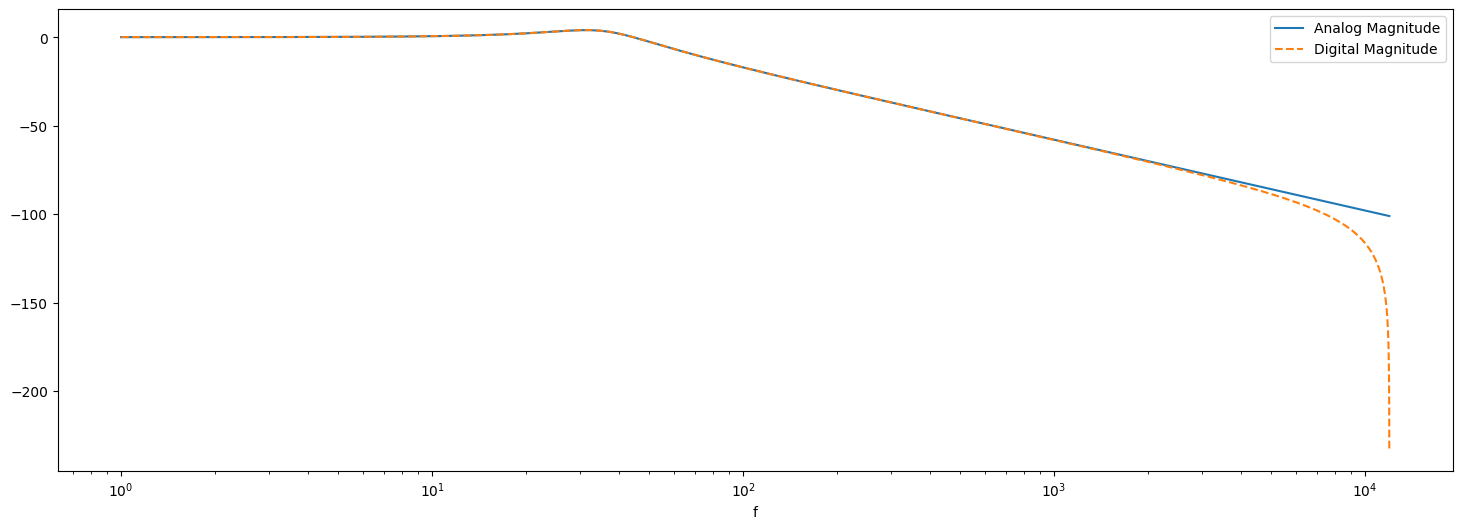

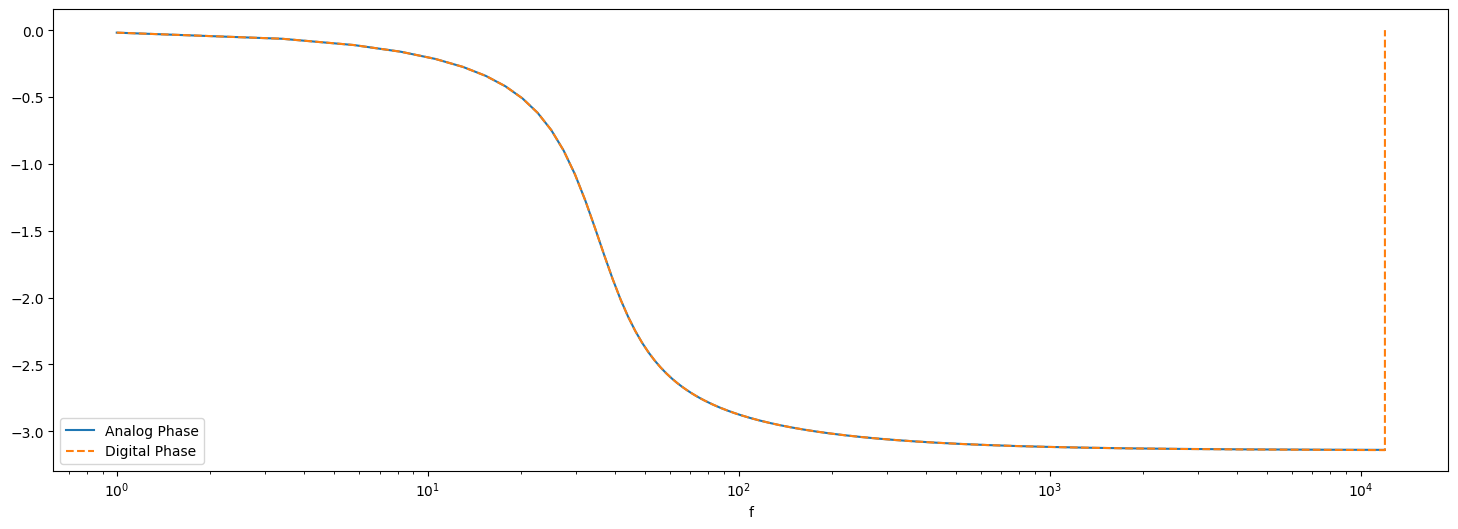

In [51]:
f_s = min_f_s_that_makes_diff_less_than_0_point_1_db
bz, az = gen_bz_az(f_s)
frequencies = np.linspace(1, f_s / 2, SAMPLE_N)
analog_output = np.array([hw(2 * np.pi * f) for f in frequencies])
digital_output = np.array([hz_w(2 * np.pi * f, 2 * np.pi * f_s, bz, az) for f in frequencies])
# Why tf the transform makes w_real in 0 and 2pi?
analog_plots = get_mod_pha_real_imag(analog_output)
digital_plots = get_mod_pha_real_imag(digital_output)
analog_plots[0] = db(analog_plots[0])
digital_plots[0] = db(digital_plots[0])

prop_desc = ['Magnitude', 'Phase', 'Real', 'Imaginary']
for prop in range(2):
    fig = plt.figure(figsize=(18, 6))
    plt.semilogx(frequencies, analog_plots[prop], '-',  label=f'Analog {prop_desc[prop]}')
    plt.semilogx(frequencies, digital_plots[prop], '--', label=f'Digital {prop_desc[prop]}')
    plt.xlabel('f')
    plt.legend()
    fig.show()

0.13320572443477982 -2.6409067640317923 -45.89746797742467


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_68689/1475343020.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


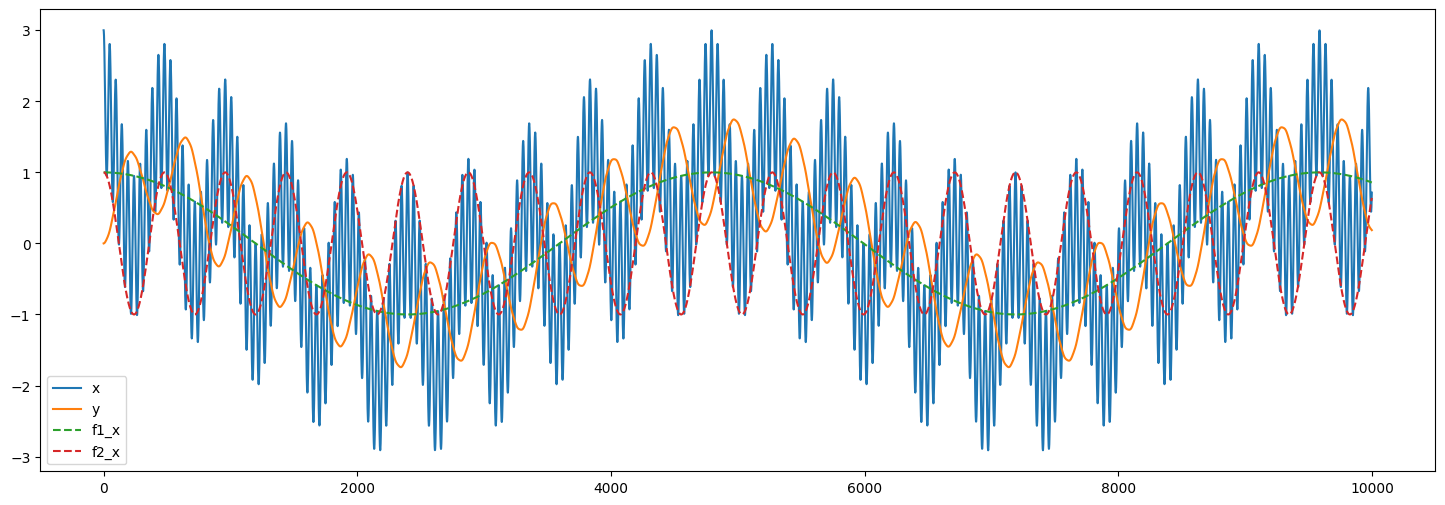

In [60]:
# [t3.d]
# 模拟角频率转数字角频率
f1, f2, f3 = 5, 50, 500
def attenuate(f):
    return db(hz_w(2 * np.pi * f, 2 * np.pi * f_s, bz, az))

print(attenuate(f1), attenuate(f2), attenuate(f3))

def x(n):
    return np.cos(2 * np.pi * f1 * n / f_s) + np.cos(2 * np.pi * f2 * n / f_s) + np.cos(2 * np.pi * f3 * n / f_s)

def f1_x(n):
    return np.cos(2 * np.pi * f1 * n / f_s)

def f2_x(n):
    return np.cos(2 * np.pi * f2 * n / f_s)

# 原来 T = 1 / fs。在数字输入中，T = 1，故角频率放缓 fs 倍
ns = np.arange(10000)
xs = x(ns)
ys = filter(bz, az, xs, len(ns))[1]
f1_xs = f1_x(ns)
f2_xs = f2_x(ns)
fig = plt.figure(figsize=(18, 6))
plt.plot(ns, xs, label='x')
plt.plot(ns, ys, label='y')
plt.plot(ns, f1_xs, '--', label='f1_x')
plt.plot(ns, f2_xs, '--', label='f2_x')
plt.legend()
fig.show()
